In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
import keras
from keras import layers, models, Sequential
from keras.preprocessing import image_dataset_from_directory


In [2]:
# TASK 3.1
# Load the dataset with resized images
testing = image_dataset_from_directory("Brain_tumor/Testing", label_mode='categorical', image_size=(256, 256))
training = image_dataset_from_directory("Brain_tumor/Training", label_mode='categorical', image_size=(256, 256))

Found 1311 files belonging to 4 classes.
Found 5712 files belonging to 4 classes.


In [3]:

# Define the number of classes in your dataset
num_classes = 4

In [4]:
# Define the model architecture
model = Sequential([
    layers.Input(shape=(256, 256, 3)),  # Input layer
    layers.Rescaling(1./255),  # Normalizing layer
    layers.Flatten(),  # Flatten layer
    layers.Dense(100, activation='relu'),  # First hidden layer with 100 neurons and relu activation
    layers.Dense(75, activation='relu'),   # Second hidden layer with 75 neurons and relu activation
    layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])

In [5]:
# Compile the model
model.compile(optimizer='sgd',  # Use "sgd" as the optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Print model summary to get trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           304 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,668,779 (75.03 MB)

 Trainable params: 19,668,779 (75.03 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
data_size = len(training)
train_size = int(data_size * 0.8)
val_size = data_size - train_size
training_set = training.take(train_size)
remaining_data = training.skip(train_size)
val_set = remaining_data.take(val_size)
# Apply memory optimization to training and validation datasets
training_set = training_set.cache().shuffle(5700).prefetch(tf.data.AUTOTUNE)
val_set = val_set.cache().shuffle(5700).prefetch(tf.data.AUTOTUNE)

In [8]:
%%time
# Fit the model for 20 epochs
history = model.fit(
    training_set,
    validation_data=val_set,
    epochs=20
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.4042 - loss: 1.3101 - val_accuracy: 0.6954 - val_loss: 0.8273
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.6107 - loss: 0.9014 - val_accuracy: 0.6884 - val_loss: 0.7422
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.6760 - loss: 0.7816 - val_accuracy: 0.7526 - val_loss: 0.6494
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7123 - loss: 0.6840 - val_accuracy: 0.6320 - val_loss: 0.8137
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7549 - loss: 0.6023 - val_accuracy: 0.7562 - val_loss: 0.6380
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7741 - loss: 0.5671 - val_accuracy: 0.7298 - val_loss: 0.7094
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7923 - loss: 0.5458 - val_accuracy: 0.7931 - val_loss: 0.5331
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8180 - loss: 0.4602 - val_acc

In [9]:
# Report the final training accuracy and validation accuracy
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", training_accuracy)
print("Final Validation Accuracy:", validation_accuracy)

Final Training Accuracy: 0.9106206297874451
Final Validation Accuracy: 0.4779929518699646


In [10]:
# TASK 3.2

# Define the model architecture for the 4-layer model
model_4_layers = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(100, activation='relu'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dense(75, activation='relu'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dense(50, activation='relu'),   # Third hidden layer with 50 neurons and sigmoid activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])



In [11]:
# Compile the model
model_4_layers.compile(optimizer='sgd',  # Use "sgd" as the optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to get trainable parameters
model_4_layers.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,672,479 (75.04 MB)

 Trainable params: 19,672,479 (75.04 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Fit the model for 20 epochs
history_4_layers = model_4_layers.fit(
    training_set,
    validation_data=val_set,
    epochs=20
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3970 - loss: 1.2622 - val_accuracy: 0.5722 - val_loss: 0.9361
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6129 - loss: 0.9377 - val_accuracy: 0.7042 - val_loss: 0.7944
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6810 - loss: 0.7981 - val_accuracy: 0.6673 - val_loss: 0.7800
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.7262 - loss: 0.6781 - val_accuracy: 0.7746 - val_loss: 0.5935
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7608 - loss: 0.6215 - val_accuracy: 0.7315 - val_loss: 0.6749
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7604 - loss: 0.6358 - val_accuracy: 0.7729 - val_loss: 0.5791
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8014 - loss: 0.5188 - val_accuracy: 0.7773 - val_loss: 0.5554
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8107 - loss: 0.5119 - val_accu

In [13]:
# Report the final training accuracy and validation accuracy for 4 layer model
training_accuracy_4_layers = history_4_layers.history['accuracy'][-1]
validation_accuracy_4_layers = history_4_layers.history['val_accuracy'][-1]

print("Final Training Accuracy:", training_accuracy_4_layers)
print("Final Validation Accuracy:", validation_accuracy_4_layers)

Final Training Accuracy: 0.9016608595848083
Final Validation Accuracy: 0.8617957830429077


In [14]:
# Define the model architecture for the 5-layer model
model_5_layers = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(100, activation='relu'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dense(75, activation='relu'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dense(50, activation='relu'),   # Third hidden layer with 50 neurons and sigmoid activation
    keras.layers.Dense(50, activation='relu'),   # Fourth hidden layer with 50 neurons and sigmoid activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])


In [15]:
# Compile the model
model_5_layers.compile(optimizer='sgd',  # Use "sgd" as the optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to get trainable parameters
model_5_layers.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,675,029 (75.05 MB)

 Trainable params: 19,675,029 (75.05 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
%%time
# Fit the model for 20 epochs
history_5_layers = model_5_layers.fit(
    training_set,
    validation_data=val_set,
    epochs=20
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.3788 - loss: 1.2702 - val_accuracy: 0.6285 - val_loss: 0.9379
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.6081 - loss: 0.9258 - val_accuracy: 0.7324 - val_loss: 0.7024
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.6812 - loss: 0.7762 - val_accuracy: 0.6655 - val_loss: 0.7795
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6982 - loss: 0.7593 - val_accuracy: 0.5739 - val_loss: 1.0667
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.7432 - loss: 0.6359 - val_accuracy: 0.7113 - val_loss: 0.6835
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.7810 - loss: 0.5564 - val_accuracy: 0.7579 - val_loss: 0.6536
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8017 - loss: 0.5202 - val_accuracy: 0.8019 - val_loss: 0.5262
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.8259 - loss: 0.4613 - val_accu

In [17]:
# Report the final training accuracy and validation accuracy for 5 layer model
training_accuracy_5_layers = history_5_layers.history['accuracy'][-1]
validation_accuracy_5_layers = history_5_layers.history['val_accuracy'][-1]

print("Final Training Accuracy:", training_accuracy_5_layers)
print("Final Validation Accuracy:", validation_accuracy_5_layers)

Final Training Accuracy: 0.9086538553237915
Final Validation Accuracy: 0.860035240650177


In [23]:
#TASK 3.3

# Model with 50% of neurons in each hidden layer
model_50_percent_neurons = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),  
    keras.layers.Rescaling(1./255),  
    keras.layers.Flatten(),  
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(38, activation='relu'),   
    keras.layers.Dense(num_classes, activation='softmax')  
])

# Model with 150% of neurons in each hidden layer
model_150_percent_neurons = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),  
    keras.layers.Rescaling(1./255),  
    keras.layers.Flatten(),  
    keras.layers.Dense(150, activation='relu'),  
    keras.layers.Dense(113, activation='relu'),   
    keras.layers.Dense(num_classes, activation='softmax')  
])

# Compile the models (using the same optimizer, loss, and metrics as before)
model_50_percent_neurons.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_150_percent_neurons.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
%%time
history_50_percent_neurons = model_50_percent_neurons.fit(training_set, validation_data=val_set, epochs=20)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3768 - loss: 1.3426 - val_accuracy: 0.5273 - val_loss: 1.0654
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5539 - loss: 0.9973 - val_accuracy: 0.6197 - val_loss: 0.8030
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6212 - loss: 0.8591 - val_accuracy: 0.6391 - val_loss: 0.8383
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6623 - loss: 0.7792 - val_accuracy: 0.6699 - val_loss: 0.7613
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6737 - loss: 0.7454 - val_accuracy: 0.7306 - val_loss: 0.6817
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7006 - loss: 0.6723 - val_accuracy: 0.6426 - val_loss: 0.7749
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7149 - loss: 0.6647 - val_accuracy: 0.7086 - val_loss: 0.7062
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7170 - loss: 0.6623 - val_accu

In [25]:
%%time
history_150_percent_neurons = model_150_percent_neurons.fit(training_set, validation_data=val_set, epochs=20)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.4086 - loss: 1.5582 - val_accuracy: 0.6382 - val_loss: 0.8794
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.6238 - loss: 0.9164 - val_accuracy: 0.7069 - val_loss: 0.7333
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.6828 - loss: 0.7525 - val_accuracy: 0.7227 - val_loss: 0.7195
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7240 - loss: 0.6789 - val_accuracy: 0.7526 - val_loss: 0.6471
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7387 - loss: 0.6387 - val_accuracy: 0.7861 - val_loss: 0.5700
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7808 - loss: 0.5602 - val_accuracy: 0.8090 - val_loss: 0.5359
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.8165 - loss: 0.5135 - val_accuracy: 0.8187 - val_loss: 0.5078
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.8085 - loss: 0.5042 - 

In [26]:
# Report the final training accuracy and validation accuracy for 50% neurons model
training_accuracy_50_percent = history_50_percent_neurons.history['accuracy'][-1]
validation_accuracy_50_percent = history_50_percent_neurons.history['val_accuracy'][-1]

print("Final Training Accuracy (50% Neurons):", training_accuracy_50_percent)
print("Final Validation Accuracy (50% Neurons):", validation_accuracy_50_percent)

# Report the final training accuracy and validation accuracy for 150% neurons model
training_accuracy_150_percent = history_150_percent_neurons.history['accuracy'][-1]
validation_accuracy_150_percent = history_150_percent_neurons.history['val_accuracy'][-1]

print("Final Training Accuracy (150% Neurons):", training_accuracy_150_percent)
print("Final Validation Accuracy (150% Neurons):", validation_accuracy_150_percent)

Final Training Accuracy (50% Neurons): 0.8218968510627747
Final Validation Accuracy (50% Neurons): 0.8045774698257446
Final Training Accuracy (150% Neurons): 0.9315996766090393
Final Validation Accuracy (150% Neurons): 0.8670774698257446


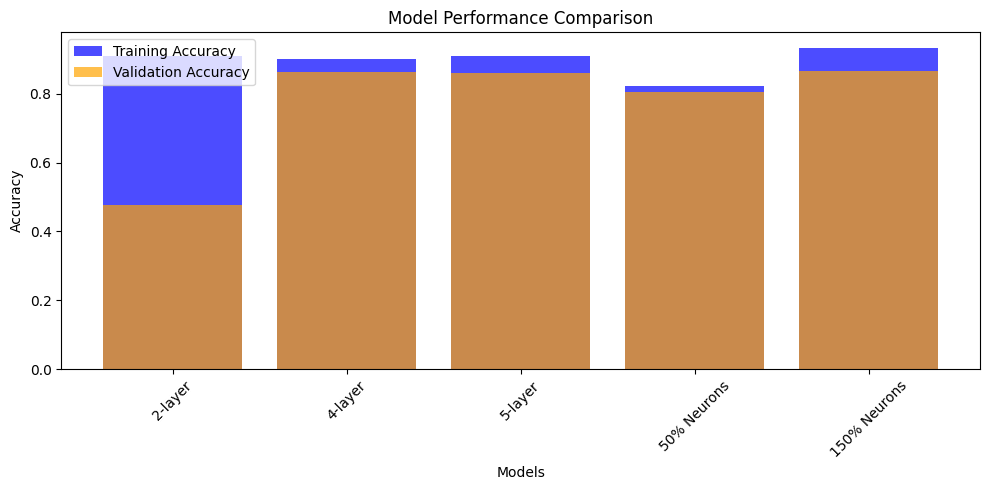

In [27]:
#TASK 3.4

# Define the models and their corresponding accuracies
models = ['2-layer', '4-layer', '5-layer', '50% Neurons', '150% Neurons']
training_accuracies = [training_accuracy, training_accuracy_4_layers, training_accuracy_5_layers, training_accuracy_50_percent, training_accuracy_150_percent]
validation_accuracies = [validation_accuracy, validation_accuracy_4_layers, validation_accuracy_5_layers, validation_accuracy_50_percent, validation_accuracy_150_percent]

# Plotting
plt.figure(figsize=(10, 5))

plt.bar(models, training_accuracies, color='blue', alpha=0.7, label='Training Accuracy')
plt.bar(models, validation_accuracies, color='orange', alpha=0.7, label='Validation Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [28]:
# TASK 3.6
# Define the model architecture with dropout layer
model_with_dropout = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(150, activation='relu'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dense(113, activation='relu'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dropout(0.25, seed=42),  # Dropout layer with 25% fraction of deactivated neurons
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])

# Compile the model
model_with_dropout.compile(optimizer='sgd',  # Use "sgd" as the optimizer
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [29]:
%%time
# Fit the model for 20 epochs
history_with_dropout = model_with_dropout.fit(
    training_set,
    validation_data=val_set,
    epochs=20
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.4007 - loss: 1.3572 - val_accuracy: 0.6285 - val_loss: 0.8683
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5970 - loss: 0.9530 - val_accuracy: 0.6743 - val_loss: 0.7969
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6628 - loss: 0.8087 - val_accuracy: 0.7271 - val_loss: 0.6703
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7130 - loss: 0.7197 - val_accuracy: 0.6752 - val_loss: 0.8194
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.7443 - loss: 0.6772 - val_accuracy: 0.6919 - val_loss: 0.7936
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.7638 - loss: 0.5908 - val_accuracy: 0.7051 - val_loss: 0.7136
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.7874 - loss: 0.5355 - val_accuracy: 0.6717 - val_loss: 0.8302
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.8117 - loss: 0.5086 - 

In [30]:
# Report the final training accuracy and validation accuracy
training_accuracy_with_dropout = history_with_dropout.history['accuracy'][-1]
validation_accuracy_with_dropout = history_with_dropout.history['val_accuracy'][-1]

print("Final Training Accuracy (with dropout):", training_accuracy_with_dropout)
print("Final Validation Accuracy (with dropout):", validation_accuracy_with_dropout)

# Calculate the difference between training and validation accuracy
difference_with_dropout = training_accuracy_with_dropout - validation_accuracy_with_dropout
print("Difference between Training and Validation Accuracy (with dropout):", difference_with_dropout)

Final Training Accuracy (with dropout): 0.8889859914779663
Final Validation Accuracy (with dropout): 0.8494718074798584
Difference between Training and Validation Accuracy (with dropout): 0.03951418399810791


In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_with_dropout.evaluate(testing)

# Report the deployment loss and accuracy
print("Deployment Loss:", test_loss)
print("Deployment Accuracy:", test_accuracy)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8397 - loss: 0.4509
Deployment Loss: 0.44871363043785095
Deployment Accuracy: 0.8405796885490417
